# Seminar 2



In [ ]:
%pylab inline

import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

import warnings
warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


# Text classification (ML model)

Let's try to solve classificateion task: classify texts into computer science and medicine.

In [ ]:
data = fetch_20newsgroups(subset='all', categories=['comp.graphics', 'sci.med'])

In [ ]:
data['target_names']

['comp.graphics', 'sci.med']

In [ ]:
texts = data['data']
target = data['target']

Let's look on one of the texts:

In [ ]:
print(texts[0])

From: dyer@spdcc.com (Steve Dyer)
Subject: Re: Analgesics with Diuretics
Organization: S.P. Dyer Computer Consulting, Cambridge MA

In article <ofk=lve00WB2AvUktO@andrew.cmu.edu> Lawrence Curcio <lc2b+@andrew.cmu.edu> writes:
>I sometimes see OTC preparations for muscle aches/back aches that
>combine aspirin with a diuretic.

You certainly do not see OTC preparations advertised as such.
The only such ridiculous concoctions are nostrums for premenstrual
syndrome, ostensibly to treat headache and "bloating" simultaneously.
They're worthless.

>The idea seems to be to reduce
>inflammation by getting rid of fluid. Does this actually work? 

That's not the idea, and no, they don't work.

-- 
Steve Dyer
dyer@ursa-major.spdcc.com aka {ima,harvard,rayssd,linus,m2c}!spdcc!dyer



**Question:** is this text about computer science or medicine? How can we tell?

In [ ]:
data['target_names'][target[0]]

'sci.med'

Now, let's split the data into train and test

In [ ]:
np.unique(target, return_counts=True) # classes are balanced

(array([0, 1]), array([973, 990]))

In [ ]:
texts_train, texts_test, y_train, y_test = train_test_split(
    texts, target, test_size=0.2, random_state=10
)

Now we want to fit a model, but the ML models cannot work with texts. We need a way to create a vector for text.

## Bag-of-words

There is a text collection $D = \{d_i\}_{i=1}^l$ and a vocabulary of all tokens in the sample $V = \{v_j\}_{j=1}^d.$ For the text  $d_i$ it is possible to construct a vector $(x_{ij})_{j=1}^d,$ where
$$x_{ij} = \sum_{v \in d_i} [v = v_j].$$

So, vector for $d_i$  contains number of times each token was used in it.

Let's use `CountVectorizer` from `sklearn` library.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(encoding='utf8')
_ = vectorizer.fit(texts_train)
len(vectorizer.vocabulary_)

29227

There are 29 227 different tokens in vocabulary. Let's look on it:

In [ ]:
vectorizer.vocabulary_

{'from': 12024,
 'beck': 5214,
 'irzr17': 14950,
 'inf': 14400,
 'tu': 26956,
 'dresden': 9904,
 'de': 8797,
 'andre': 4133,
 'subject': 25311,
 're': 22035,
 'pov': 20984,
 'ray': 21990,
 'problem': 21280,
 'please': 20697,
 'help': 13304,
 'organization': 19490,
 'dept': 9094,
 'of': 19241,
 'computer': 7692,
 'science': 23585,
 'germany': 12364,
 'lines': 16427,
 '13': 451,
 'distribution': 9616,
 'world': 28772,
 'reply': 22535,
 'to': 26499,
 'andre_beck': 4134,
 'irs': 14944,
 'nntp': 18814,
 'posting': 20955,
 'host': 13697,
 'what': 28495,
 'about': 3280,
 'qrttoppm': 21693,
 'file': 11526,
 'dis': 9438,
 'ppmtotga': 21019,
 'tga': 26187,
 'brain': 5848,
 'inside': 14592,
 'abpsoft': 3285,
 'mehl': 17425,
 'black': 5563,
 'sybase': 25729,
 'com': 7473,
 'chris': 7015,
 'cystic': 8593,
 'breast': 5888,
 'disease': 9513,
 'inc': 14270,
 '18': 715,
 'my': 18322,
 'mom': 17992,
 'has': 13154,
 'just': 15405,
 'been': 5233,
 'diagnosed': 9273,
 'with': 28665,
 'big': 5428,
 'relief'

There are words (city,  hear, point), numbers (14, 47974) and some combinations of letters/numbers (sd345, m2c, c63zf3)

**Question:** what are these combinations? Why are they in the texts?

It is possible to specify `tokenizer` or `token_pattern` to specify how to tokenize the texts. By default: `(?u)\b\w\w+\b` (tokens of 2 or more alphanumeric characters)

If we apply the transformation, we will get sparse matrix.

In [ ]:
vectorizer.transform(texts_train[:1])

<1x29227 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer.transform(texts_train[:1]).indices)
print(vectorizer.transform(texts_train[:1]).data)

### Sparse matrices

Sparse matrix is a matrix in which most of the elements are zero.

**Question:** why vector for text is sparse?

Sparse matrix in `scipy` library looks like a dictionary: index and vale (if index not present that means that there is zero in the cell)

In [ ]:
print(vectorizer.transform(texts_train[:1]))

  (0, 451)	1
  (0, 3280)	1
  (0, 3285)	1
  (0, 4133)	2
  (0, 4134)	2
  (0, 5214)	3
  (0, 5848)	1
  (0, 7692)	1
  (0, 8797)	4
  (0, 9094)	1
  (0, 9438)	1
  (0, 9616)	1
  (0, 9904)	5
  (0, 11526)	2
  (0, 12024)	1
  (0, 12364)	1
  (0, 13304)	1
  (0, 13697)	1
  (0, 14400)	4
  (0, 14592)	1
  (0, 14944)	2
  (0, 14950)	2
  (0, 16427)	1
  (0, 17425)	1
  (0, 18814)	1
  (0, 19241)	1
  (0, 19490)	1
  (0, 20697)	1
  (0, 20955)	1
  (0, 20984)	1
  (0, 21019)	1
  (0, 21280)	1
  (0, 21693)	1
  (0, 21990)	1
  (0, 22035)	1
  (0, 22535)	1
  (0, 23585)	1
  (0, 25311)	1
  (0, 26187)	1
  (0, 26499)	1
  (0, 26956)	5
  (0, 28495)	1
  (0, 28772)	1


Using sparse matrices may speed up the computation (and reduce memory consumption)

In [ ]:
#2 matrices with 9 000 000 elements, only 10 of wich are non-zero
matrix1 = np.zeros((3000, 3000))
matrix1[np.random.randint(3000, size=10), np.random.randint(3000, size=10)] = 1

matrix2 = np.zeros((3000, 3000))
matrix2[np.random.randint(3000, size=10), np.random.randint(3000, size=10)] = 1

Use numpy:

In [ ]:
%%time
mult = matrix1 @ matrix2

CPU times: user 3.02 s, sys: 239 ms, total: 3.26 s
Wall time: 2.31 s


And scipy:

In [ ]:
from scipy.sparse import csr_matrix

m1 = csr_matrix(matrix1)
m2 = csr_matrix(matrix2)

In [ ]:
%%time
m = m1 @ m2

CPU times: user 879 µs, sys: 0 ns, total: 879 µs
Wall time: 2.51 ms


Much faster.


However, the matrix should really be sparse, if we try storing dense matrix like this:

In [ ]:
#2 dense matrices, 9 000 000 non-zero elements
m1 = csr_matrix(np.ones((3000, 3000)))
m2 = csr_matrix(np.ones((3000, 3000)))

In [ ]:
%%time
m = m1 @ m2

CPU times: user 1min 26s, sys: 188 ms, total: 1min 26s
Wall time: 1min 28s


It was time-consuming.



Now let's return to our task: classify texts. Now we have vectors and we can apply ML models (models from `sklearn` can work with sparse matrices)

In [ ]:
#Funstion for training and testing Logistic regression
#metric is accuracy
#cross-validation for hyperparameter search
def train_model(X_train, y_train, X_test, y_test):
    alphas = np.logspace(-1, 3, 10)
    searcher = GridSearchCV(LogisticRegression(), [{'C': alphas, 'max_iter': [500]}],
                            scoring='accuracy', cv=5, n_jobs=-1)
    searcher.fit(X_train, y_train)

    best_alpha = searcher.best_params_["C"]
    print("Best alpha = %.4f" % best_alpha)

    model = LogisticRegression(C=best_alpha, max_iter=500)
    model.fit(X_train, y_train)

    print("Train accuracy = %.4f" % accuracy_score(y_train, model.predict(X_train)))
    print("Test accuracy = %.4f" % accuracy_score(y_test, model.predict(X_test)))

In [ ]:
X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [ ]:
train_model(X_train, y_train, X_test, y_test)

Best alpha = 16.6810
Train accuracy = 1.0000
Test accuracy = 0.9720


The quality seems to be ok, BoW did provide good vectors.


However, it takes into account only absolute number of times the token was in the text. It does not take into accuount the importance of the token.

For example, stop words will be very frequent in all the texts, they do not carry any useful info; but terms may occur often in one text and not occur in the majority of other texts and they are important.

## TF-IDF

Another approach to vectorizing texts [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf) (**T**erm **F**requency–**I**nverse **D**ocument **F**requency) tackles this problem.

There is a text collection $D$.  For every token $t$ from $d \in D$ compute:

1. Term Frequency:
$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$
where $n_{td}$ — number of times $t$ occures in text $d$.
1. Inverse Document Frequency
$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$
where $\left| \{d\in D: t \in d\} \right|$ – number of texts in the collection containing token $t$.

For every pair token-text $(t, d)$ compute:

$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$


For frequent tokens (stopwords) $\text{idf}$ would be small

For infrequent not important tokens (like mistakes, e-mail adresses) $\text{tf}$ will be small


For infrequent important tokens (that may determine the topic of the text) both $\text{idf}$ and $\text{tf}$ will not be small.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(encoding='utf8')
_ = vectorizer.fit(texts_train)
len(vectorizer.vocabulary_)

29227

Same approach to tokenization gives us the same vocabulary.

And the matrix is also sparse (same number of non-zero elements)

In [ ]:
vectorizer.transform(texts_train[:1])

<1x29227 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in Compressed Sparse Row format>

But the stored values are different:

In [ ]:
print(vectorizer.transform(texts[:1]).indices)
print(vectorizer.transform(texts[:1]).data)

[ 3419  3486  3633  3818  4097  4127  4138  4461  4555  4575  4616  4963
  5186  5606  6167  6385  6729  7316  7473  7482  7692  7743  7916  8497
  9631  9632  9712  9741  9773 10080 10241 11721 11805 12024 12376 13150
 13218 14015 14120 14253 14432 16116 16140 16445 16775 16812 16821 16947
 18280 18816 18935 18937 19241 19263 19356 19490 19553 19566 21124 21137
 22002 22035 22227 22873 22882 23743 23753 24253 24588 24692 25072 25311
 25396 25758 26209 26211 26283 26318 26499 26802 27566 28665 28751 28793
 28831 29097]
[0.23376552 0.06015437 0.11008645 0.08101145 0.10526438 0.04023415
 0.15829423 0.02891128 0.03221137 0.03127267 0.10750261 0.05494616
 0.02705738 0.12170482 0.03503833 0.08310941 0.06866943 0.16621882
 0.06590317 0.09846807 0.04348468 0.12170482 0.08908792 0.10329013
 0.11688276 0.11314248 0.03500662 0.03948371 0.03977595 0.48032027
 0.04937804 0.09846807 0.04409804 0.01676178 0.06163869 0.07094142
 0.08908792 0.13733887 0.08830816 0.02039305 0.08756307 0.09076549
 0.105

We can check, which tokens have the biggest $\text{tf-idf}$ value:

In [ ]:
vector = vectorizer.transform(texts[:1])
vectorizer.get_feature_names_out()[vector.A.flatten().argsort()[::-1][:10]]

array(['dyer', 'spdcc', 'aches', 'preparations', 'otc', 'cmu', 'andrew',
       'idea', 'steve', 'concoctions'], dtype=object)

Let's transform the texts and train models

In [ ]:
X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [ ]:
train_model(X_train, y_train, X_test, y_test)

Best alpha = 129.1550
Train accuracy = 1.0000
Test accuracy = 0.9898


## Adding tokenization, lemmatization, stemming

Now, let's apply some techniques from previous seminar.

Let's start with tokenization.

In [ ]:
import nltk

nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

In [ ]:
word_tokenize(texts[0])[:10]

['From', ':', 'dyer', '@', 'spdcc.com', '(', 'Steve', 'Dyer', ')', 'Subject']

We see that this tokenizer splits the e-mail address, let's try to preserve it

In [ ]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()
tknzr.tokenize(texts[0])[:10]

['From',
 ':',
 'dyer@spdcc.com',
 '(',
 'Steve',
 'Dyer',
 ')',
 'Subject',
 ':',
 'Re']

Let's try both approaches with this tokenizer. We need to set `tokenizer` argument.

In [ ]:
vectorizer = CountVectorizer(encoding='utf8',
                             tokenizer=tknzr.tokenize).fit(texts_train)

X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

train_model(X_train, y_train, X_test, y_test)

Best alpha = 129.1550
Train accuracy = 1.0000
Test accuracy = 0.9618


In [ ]:
vectorizer = TfidfVectorizer(encoding='utf8',
                             tokenizer=tknzr.tokenize).fit(texts_train)

X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

train_model(X_train, y_train, X_test, y_test)

Best alpha = 129.1550
Train accuracy = 1.0000
Test accuracy = 0.9873


The vocabulary size increased, because we added punctuatuon, e-mail adresses, etc.

In [ ]:
len(vectorizer.vocabulary_)

31914

Now, let's try stemming:

In [ ]:
stemmer = nltk.stem.snowball.EnglishStemmer()

def tokenize_and_stemm(text):
  tokens = tknzr.tokenize(text)
  return list(map(stemmer.stem, tokens))

In [ ]:
' '.join(tokenize_and_stemm(texts[0]))

'from : dyer@spdcc.com ( steve dyer ) subject : re : analges with diuret organ : s . p . dyer comput consult , cambridg ma in articl <ofk=lve00wb2avukto@andrew.cmu.edu> lawrenc curcio <lc2b+@andrew.cmu.edu> write : > i sometim see otc prepar for muscl ach / back ach that > combin aspirin with a diuret . you certain do not see otc prepar advertis as such . the onli such ridicul concoct are nostrum for premenstru syndrom , ostens to treat headach and " bloat " simultan . they\'r worthless . > the idea seem to be to reduc > inflamm by get rid of fluid . doe this actual work ? that not the idea , and no , they don\'t work . - - steve dyer dyer@ursa-major.spdcc.com aka { ima , harvard , rayssd , linus , m2c } ! spdcc ! dyer'

In [ ]:
vectorizer = CountVectorizer(encoding='utf8',
                             tokenizer=tokenize_and_stemm).fit(texts_train)

X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

train_model(X_train, y_train, X_test, y_test)

Best alpha = 0.1000
Train accuracy = 0.9987
Test accuracy = 0.9720


In [ ]:
vectorizer = TfidfVectorizer(encoding='utf8',
                             tokenizer=tokenize_and_stemm).fit(texts_train)

X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

train_model(X_train, y_train, X_test, y_test)

Best alpha = 359.3814
Train accuracy = 1.0000
Test accuracy = 0.9949


In [ ]:
len(vectorizer.vocabulary_)

25427

The result seems to be very good, but let's try lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
  tokens = tknzr.tokenize(text)
  return list(map(lemmatizer.lemmatize, tokens))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
' '.join(tokenize_and_lemmatize(texts[0]))

'From : dyer@spdcc.com ( Steve Dyer ) Subject : Re : Analgesics with Diuretics Organization : S . P . Dyer Computer Consulting , Cambridge MA In article <ofk=lve00WB2AvUktO@andrew.cmu.edu> Lawrence Curcio <lc2b+@andrew.cmu.edu> writes : > I sometimes see OTC preparation for muscle ache / back ache that > combine aspirin with a diuretic . You certainly do not see OTC preparation advertised a such . The only such ridiculous concoction are nostrum for premenstrual syndrome , ostensibly to treat headache and " bloating " simultaneously . They\'re worthless . > The idea seems to be to reduce > inflammation by getting rid of fluid . Does this actually work ? That\'s not the idea , and no , they don\'t work . - - Steve Dyer dyer@ursa-major.spdcc.com aka { ima , harvard , rayssd , linus , m2c } ! spdcc ! dyer'

Are lowercase/uppercase words the problem? They are different for stemmer and lemmatizer. By default the vectorizers will put all tokens in lowercase (`lowercase` argument)

In [ ]:
vectorizer = CountVectorizer(encoding='utf8',
                             tokenizer=tokenize_and_lemmatize).fit(texts_train)

X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

train_model(X_train, y_train, X_test, y_test)

Best alpha = 5.9948
Train accuracy = 1.0000
Test accuracy = 0.9618


In [ ]:
vectorizer = CountVectorizer(encoding='utf8',
                             tokenizer=tokenize_and_lemmatize).fit(texts_train)

X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

train_model(X_train, y_train, X_test, y_test)

Best alpha = 5.9948
Train accuracy = 1.0000
Test accuracy = 0.9618


In [ ]:
len(vectorizer.vocabulary_)

29811

Actually, lemmatization from nltk may not lemmatize all the words

In [ ]:
example = '''
Jane doesn\'t love her best friend abc@gmail.com.
They met in Paris 10 years ago while running.
She has many apples'''

In [ ]:
tokenize_and_lemmatize(example)

['Jane',
 "doesn't",
 'love',
 'her',
 'best',
 'friend',
 'abc@gmail.com',
 '.',
 'They',
 'met',
 'in',
 'Paris',
 '10',
 'year',
 'ago',
 'while',
 'running',
 '.',
 'She',
 'ha',
 'many',
 'apple']

'Apple', 'year' seems to be ok, but 'best', 'met', 'running' are not changed, and 'ha' from 'has'.

Let's try to find another lemmatizer. For example, from spaCy library.

## SpaCy

SpaCy ([documentation](https://spacy.io/models)) is a library for NLP. It contains models for different languages of different sizes that can be used for various tasks.

Let's use it for lemmatization.

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!spacy download en_core_web_lg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 107.6 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import en_core_web_lg

#Creating the model
nlp = en_core_web_lg.load(disable=['parser'])
nlp.max_length = 5000000

In [ ]:
#Prepare data for lemmatiization
nlp_doc = nlp(example)
nlp_doc


Jane doesn't love her best friend abc@gmail.com.
They met in Paris 10 years ago while running.
She has many apples

In [ ]:
for token in nlp_doc:
  print(token.lemma_)



Jane
do
not
love
her
good
friend
abc@gmail.com
.


they
meet
in
Paris
10
year
ago
while
run
.


she
have
many
apple


Easy to see that all the words are in the normal form and it actually tokenized text itself.

In [ ]:

def tokenize_and_lemmatize_spacy(text):
  nlp_doc = nlp(text)
  #filter the spaces
  return [token.lemma_  for token in nlp_doc if token.pos_ != 'SPACE']

In [ ]:
tokenize_and_lemmatize_spacy(example)

['Jane',
 'do',
 'not',
 'love',
 'her',
 'good',
 'friend',
 'abc@gmail.com',
 '.',
 'they',
 'meet',
 'in',
 'Paris',
 '10',
 'year',
 'ago',
 'while',
 'run',
 '.',
 'she',
 'have',
 'many',
 'apple']

In [ ]:
' '.join(tokenize_and_lemmatize_spacy(texts[0]))

'from : dyer@spdcc.com ( Steve Dyer ) Subject : re : analgesic with Diuretics Organization : S.P. Dyer Computer Consulting , Cambridge MA in article < ofk=lve00WB2AvUktO@andrew.cmu.edu > Lawrence Curcio < lc2b+@andrew.cmu.edu > write : > I sometimes see OTC preparation for muscle ache / back ache that > combine aspirin with a diuretic . you certainly do not see OTC preparation advertise as such . the only such ridiculous concoction be nostrum for premenstrual syndrome , ostensibly to treat headache and " bloat " simultaneously . they be worthless . > the idea seem to be to reduce > inflammation by get rid of fluid . do this actually work ? that be not the idea , and no , they do not work . -- Steve Dyer dyer@ursa-major.spdcc.com aka { ima , harvard , rayssd , linus , m2c}!spdcc!dyer'

In [ ]:
print(texts[0])

From: dyer@spdcc.com (Steve Dyer)
Subject: Re: Analgesics with Diuretics
Organization: S.P. Dyer Computer Consulting, Cambridge MA

In article <ofk=lve00WB2AvUktO@andrew.cmu.edu> Lawrence Curcio <lc2b+@andrew.cmu.edu> writes:
>I sometimes see OTC preparations for muscle aches/back aches that
>combine aspirin with a diuretic.

You certainly do not see OTC preparations advertised as such.
The only such ridiculous concoctions are nostrums for premenstrual
syndrome, ostensibly to treat headache and "bloating" simultaneously.
They're worthless.

>The idea seems to be to reduce
>inflammation by getting rid of fluid. Does this actually work? 

That's not the idea, and no, they don't work.

-- 
Steve Dyer
dyer@ursa-major.spdcc.com aka {ima,harvard,rayssd,linus,m2c}!spdcc!dyer



The code may take a while to run (because model has to analyze the lext to find the lemmas)

In [ ]:
vectorizer = CountVectorizer(encoding='utf8',
                             tokenizer=tokenize_and_lemmatize_spacy).fit(texts_train)

X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

train_model(X_train, y_train, X_test, y_test)

Best alpha = 129.1550
Train accuracy = 1.0000
Test accuracy = 0.9695


In [ ]:
vectorizer = TfidfVectorizer(encoding='utf8',
                             tokenizer=tokenize_and_lemmatize_spacy).fit(texts_train)

X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

train_model(X_train, y_train, X_test, y_test)

Best alpha = 359.3814
Train accuracy = 1.0000
Test accuracy = 0.9796


In [ ]:
len(vectorizer.vocabulary_)

27950

# Pytorch

Pytorch - Library for deep learning ([documentation](https://pytorch.org/docs/stable/index.html))

* Automatic gradient calculations
* Many neural network blocks
* Many auxiliary tools (preprocessing, optimizers, ...)
* Capability for GPU computations (training acceleration)



In [ ]:
import torch
import numpy as np

torch, like numpy, allows working with matrices:

* Matrix creation
* Element-wise operations with numbers/matrices
* Matrix multiplication
* Row/column calculations


In [ ]:
x = np.arange(16).reshape(4, 4)

print("X :\n %s" % x)
print("add 5 :\n%s" % (x + 5))
print("X * X :\n %s" % (x * x))
print("X*X^T  :\n", np.dot(x, x.T))
print("mean over cols :\n%s" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s" % (np.cumsum(x, axis=0)))

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X * X :
 [[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]
 [144 169 196 225]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
[ 1.5  5.5  9.5 13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [ ]:
x = torch.arange(0,16).view(4,4).type(torch.FloatTensor)

print("X :\n%s" % x)
print("add 5 :\n%s" % (x + 5))
print("X * X :\n %s" % (x * x))
print("X*X^T  :\n", torch.matmul(x, x.transpose(1, 0)))
print("mean over cols :\n", torch.mean(x, dim=-1))
print("cumsum of cols :\n", torch.cumsum(x, dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X * X :
 tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


Functions are very similar, but there are some differences:


```
x.reshape([1,2,8]) -> x.view(1,2,8)
x.sum(axis=-1) -> x.sum(dim=-1)
x.astype('int64') -> x.type(torch.int64)
```


Easy to convert between them:

```
torch.from_numpy(npx) -- вернет Tensor
tt.numpy() -- вернет Numpy Array
```





However, in some situatuions where numpy gives a number, pytorch gives tensor (why? - we'll see later). To extract it, we may use the `item`:
```
torch.tensor([1]).item() -> 1
```

In [ ]:
x.sum()

tensor(120.)

In [ ]:
x.sum().item()

120.0

**Task:** compute $\sin^2 x + \cos^2 x$ using torch

In [ ]:
x = torch.linspace(0, 2 * np.pi, 16, dtype=torch.float64)

out = torch.sin(x) ** 2 + torch.cos(x) ** 2 #YOUR CODE

print(out.numpy())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
out

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
       dtype=torch.float64)

# Automatic gradients

For training neural networks, gradient descent (or some modification of it) is used. Calculating gradients manually is time-consuming (and there may be errors). Therefore,oytorch has automatic gradient calculation. Many complex neural network blocks are just combinations of matrix multiplication, known functions, etc.

Each tensor in pytorch has a `requires_grad` flag:

1. Create a variable: `a = torch.tensor(..., requires_grad=True)`

2. Define some differentiable function: `loss = loss_function(a)`

3. Request backward pass: `loss.backward()`

4. Gradients will be available in `a.grads`

Important:

* The loss function can be changed dynamically, for example on each batch.

* After computing `.backward()`, gradients are stored in `.grad` of each involved variable, and subsequent calls accumulate gradients. This allows using multiple error functions or virtually increasing `batch_size`. Therefore, after each optimizer step, gradients should be zeroed out.

## Leaf vs Non-leaf Variable:





```
x = torch.tensor([1., 2., 3., 4.], requires_grad=True))  # leaf tensor
y = x + 1  # not a leaf variable
```

Gradients are saved only for `leaf tensor` (the one for which we specified that we need to store it) `non-leaf` - something in the middle, most likely not useful.


THis behaviour helps us to reduce memory-consumption. All tensors with  `requires_grad = False` are `leaf tensors` by default.

Note: computing gradients is possible only for float/compex types:

In [ ]:
# will not work
x = torch.tensor([1, 2, 3, 4], requires_grad=True)

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

Soetimes we want to use several tensors without storing its gradient (set `requires_grad=False` for all of them). For example, when we test a model (we already fitted it, no need to waste time on gradients).

It is possible to use `with torch.no_grad()` or `detach`:

In [ ]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
    z = torch.exp(x)
    print(z.requires_grad)

# detach from the graph
w = torch.log(x).detach()
print(w.requires_grad)

True
True
False
False


Before using neural networks, let's try to build simple linear regression by hand. Let's use Boston dataset ([download train data](https://www.kaggle.com/competitions/boston-housing/data?select=train.csv))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('train.csv')
x = df.drop(columns=['medv']).values
y = df['medv'].values

#select one column for simplicity.
x = x[:, -1] / x[:, -1].std()
y = y / y.std()

plt.scatter(x, y)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

Reminder: linear regression if there is 1 feature $y = wx + b$

In [ ]:
# weights of the model, requires_grad=True
#(because we will compute gradients)
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#train data
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# all tensors are leaf (because they are created from scratch, not computed)
# x and y do not require gradients
for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)

Let's use MSE as loss function: $\frac{1}{l}\sum_{i=1}^l(\hat{y}_i - y_i)^2$

In [ ]:
#Computing MSE
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

#Automatically compute gradients
loss.backward()

#Now, attribute .grad contains gradient

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

# if requires_grad=False or the tensor is non-leaf
# there will be no gradients

print("Non-Leaf x dL/dx = \n", x.grad)
print("Non-Leaf loss dL/dpred = \n", y_pred.grad)

## Gradients of non-leaf tensors

`y_pred` is non-leaf and does not have gradient (we do not need it, we are interested in the gredients for weights)


But if we need to save the gradient, we can use `.retain_grad()`.


In [ ]:
y_pred = w * x + b

y_pred.retain_grad()

loss = torch.mean((y_pred - y)**2)
loss.backward()

print("Non-Leaf loss dL/dpred = \n", y_pred.grad[:10])

# Fit linear regression

In [ ]:
from IPython.display import clear_output

lr = 0.1
for i in range(100):

    #Compute MSE
    y_pred = w * x  + b
    loss = torch.mean((y_pred - y)**2)

    #Automatically compute gradients
    loss.backward()

    #Gradient descent step
    with torch.no_grad():
      w -= lr * w.grad
      b -= lr * b.grad

    #Set gradients to zero, because we already used them
    w.grad.zero_()
    b.grad.zero_()

    #Visualization
    if (i + 1) % 5==0:

        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(),y.numpy())
        plt.plot(x.numpy(),y_pred.data.numpy(),color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

# Optimizers

We use vanilla gradient descent:
  
$$\theta^{n+1} = \theta^{n} - \alpha \nabla_{\theta}L$$


There is only one hyperparameter: $\alpha$ is `learning_rate`.

There are a lot of  modifications, like _Momentum_:

$$\theta^{n+1} = \theta^{n} - U^{n}\\
U^{n} = \gamma U^{n-1} + \alpha \nabla_{\theta}(L)
$$


We do not eant to implement them, pytorch has a great variety of popular optimizers:    
http://pytorch.org/docs/master/optim.html




They are easy to use:

- specify the list of parameters to optimize
- `opt.step()`  updates all the weights
- `opt.zero_grad()` zeros all the gradients





In [ ]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#Let's use some optimizer from torch
opt = torch.optim.RMSprop([w, b], lr=0.1)

for i in range(100):

    y_pred = w * x  + b
    loss = torch.mean((y_pred - y)**2)

    loss.backward()

    #Gradient step and zero gradients
    opt.step()
    opt.zero_grad()


    if (i + 1) % 5 == 0:

        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(), color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

# Neural networks

## Highlevel-API

Controlling every weight in neural network is not convenient (there may be thousands, millions, billions of them). Pytorch offers high level-API: http://pytorch.org/docs/master/nn.html#torch.nn.Module (we do not need to know a lot about the layer, params, etc. to use it)

If we want to create our own NN, we need to inheret from torch.nn.Module, define layers/parameters, and `forward` function, `backward`  will be automatically created

Let's use some computer vision dataset - MNIST.

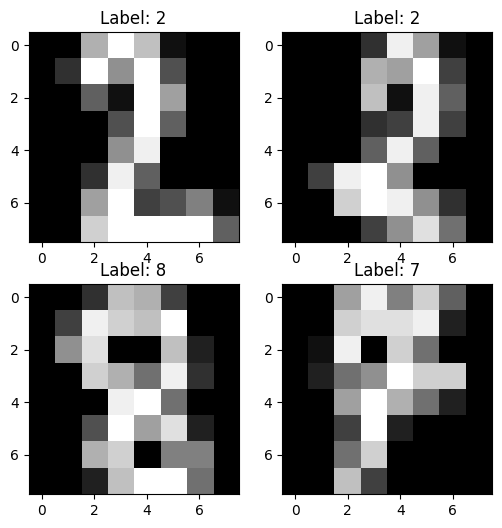

In [ ]:
# MNIST
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y)
X_train, X_val,  y_train,  y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val)

plt.figure(figsize=[6, 6])
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title("Label: %i" % y_train[i])
    plt.imshow(X_train[i].reshape([8, 8]), cmap='gray');

Let's create our own NNthat will identify which digit is shown in an image. We'll build it using pytorch layers.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    #Desctibe the network layers
    def __init__(self, hidden_size=20):
        super(Net, self).__init__()
        #Linear layer https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
        self.fc1 = nn.Linear(X_train.shape[1], hidden_size)
        self.fc2 = nn.Linear(hidden_size, 10)

    #How to use the layers
    def forward(self, x):
        #Linear + ReLU
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=-1)


The model will take an image vector (dimension 64) as an input, then apply a linear layer to get a vector of dimension 40 (40 neurons in the hidden layer), apply ReLU activation function, then apply another linear layer to get 10 neurons (since there are 10 classes).

If we have several hidden layers, their dimensions should agree (if layer 1 returns vector of size 50, layer 2 should accept vector of size 50)

The activation function will be softmax to conveniently obtain probabilities.

In [ ]:
#Create model
model = Net()
tt = torch.from_numpy(X_train[:5, :].astype(np.float32))

#Use model
output = model(tt)

print('Model outputs: \n', output)

Model outputs: 
 tensor([[-0.5050, -3.4979, -4.7555, -6.0413, -2.2256, -5.1004, -2.4877, -2.2946,
         -3.8698, -3.3133],
        [-0.0304, -4.5528, -6.5500, -7.7359, -6.9731, -7.1484, -5.7604, -5.1078,
         -5.7828, -5.6444],
        [-0.5504, -5.7394, -3.8862, -7.1302, -3.5574, -5.3567, -2.4145, -1.8293,
         -2.9270, -2.7802],
        [-0.9785, -5.0471, -3.1536, -4.6325, -2.7806, -4.2432, -2.1483, -1.1734,
         -5.3822, -2.8420],
        [-1.1235, -4.5266, -3.1888, -3.4441, -2.0207, -4.3554, -1.5540, -1.8040,
         -7.0784, -2.6794]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
# Get probabilities
probs = torch.exp(output)
print('Probs: \n', probs)

Probs: 
 tensor([[3.1342e-02, 5.7999e-02, 4.9944e-02, 4.0861e-02, 2.1053e-01, 1.2257e-01,
         1.7013e-01, 1.4673e-01, 2.7907e-02, 1.4198e-01],
        [6.6477e-02, 4.4027e-02, 2.6136e-02, 2.4833e-04, 1.9005e-01, 1.8585e-01,
         3.4181e-01, 1.0901e-02, 1.2128e-01, 1.3209e-02],
        [1.4144e-02, 2.7627e-02, 5.0753e-02, 9.4298e-03, 1.8598e-01, 4.3953e-02,
         4.4567e-01, 6.8072e-02, 4.2176e-02, 1.1220e-01],
        [2.7898e-02, 2.8095e-01, 6.0253e-03, 2.2497e-02, 1.4364e-01, 4.4517e-02,
         1.0908e-01, 1.7185e-02, 2.5741e-01, 9.0800e-02],
        [7.4426e-03, 3.8975e-01, 3.0583e-03, 9.9479e-04, 9.9470e-02, 2.9509e-02,
         1.0807e-01, 1.6207e-01, 9.6867e-02, 1.0278e-01]],
       grad_fn=<ExpBackward0>)


In [ ]:
probs.sum(dim=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

In [ ]:
#Get predictions
pred = probs.argmax(dim=-1)
print('Pred: \n', pred.data.numpy())
print('Truth: \n', y_train[:5])

Pred: 
 [4 6 6 1 1]
Truth: 
 [2 2 8 7 7]


Training

We need
- iterator (to upload batches)
- function to train model (1 epoch)
- function to test model

In [ ]:
from IPython.display import clear_output
from tqdm import trange

# function to iterate
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [ ]:
def train(model, optimizer, batchsize=32):
    loss_log = []

    #set model to train state
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        #Convert numpy data to torch
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        #Zero gradients
        optimizer.zero_grad()

        #Used data, computed loss
        output = model(data)
        #this loss uses logits, not probabilities
        loss = F.nll_loss(output, target)

        #Computed gradients
        loss.backward()

        #Step
        optimizer.step()

        #Save the value of loss function
        loss = loss.item()
        loss_log.append(loss)
    return loss_log


# Test using X_val, y_val
# No need to use optimizer
def test(model):
    loss_log = []

    #set model to testinf state
    model.eval()
    for x_batch, y_batch in iterate_minibatches(X_val, y_val, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        with torch.no_grad():
          output = model(data)
          loss = F.nll_loss(output, target)

          loss = loss.item()
        loss_log.append(loss)
    return loss_log

Let's draw plots to track training process

In [ ]:
def plot_history(train_history, val_history, title='loss', steps_test=1):
    plt.figure()
    plt.plot(train_history, label='Train loss')
    plt.plot(np.arange(0, len(val_history)) * steps_test, val_history, label='Validation loss')
    plt.legend()
    plt.show()

100%|██████████| 10/10 [00:00<00:00, 1809.14it/s]


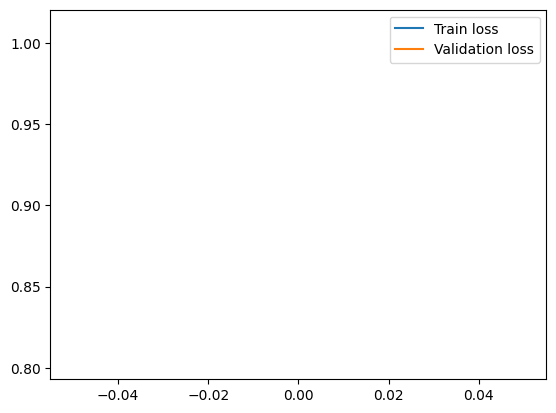

100%|██████████| 10/10 [00:00<00:00, 1158.07it/s]


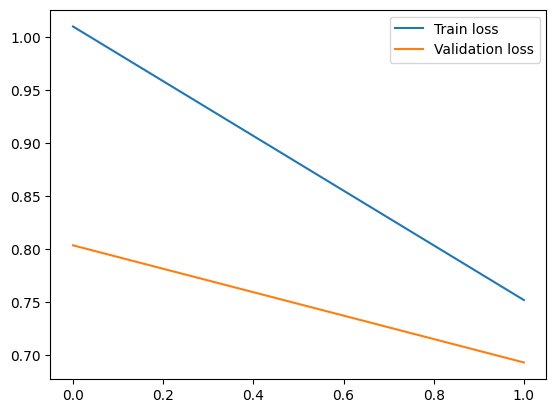

100%|██████████| 10/10 [00:00<00:00, 2708.62it/s]


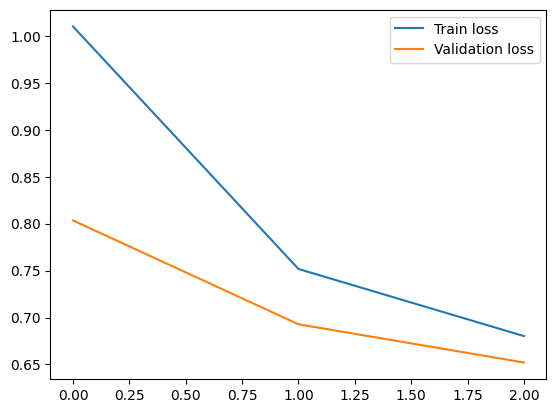

100%|██████████| 10/10 [00:00<00:00, 1533.40it/s]


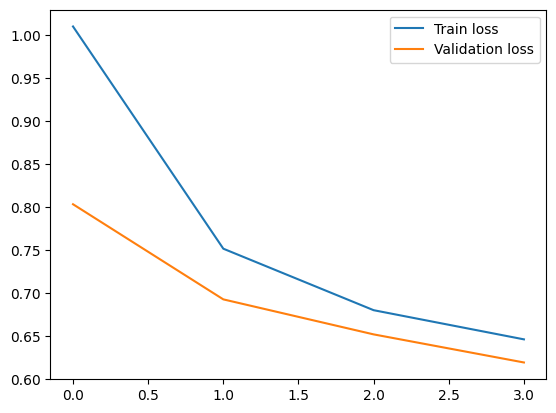

100%|██████████| 10/10 [00:00<00:00, 2253.19it/s]


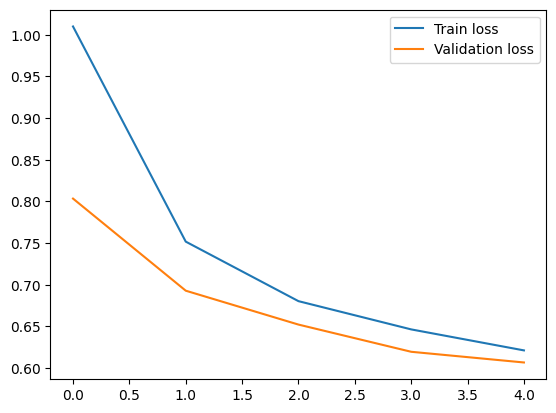

100%|██████████| 10/10 [00:00<00:00, 2839.94it/s]


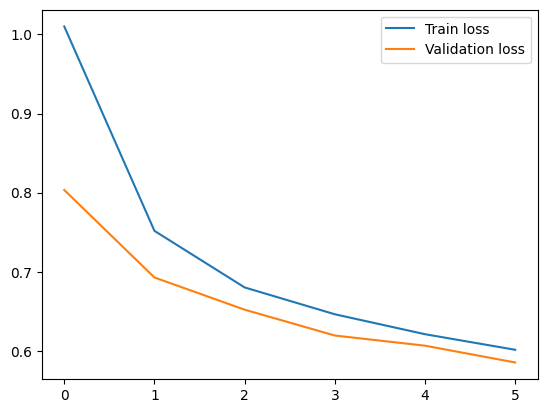

100%|██████████| 10/10 [00:00<00:00, 958.76it/s]


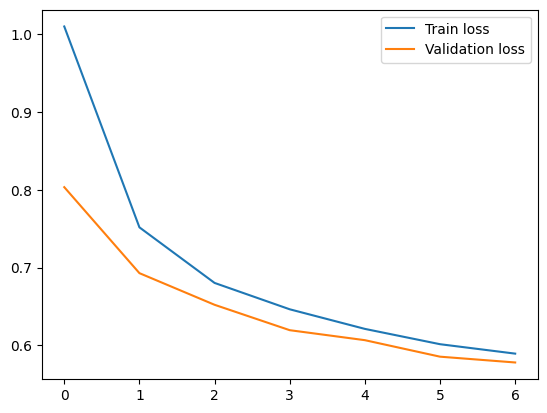

100%|██████████| 10/10 [00:00<00:00, 2932.46it/s]


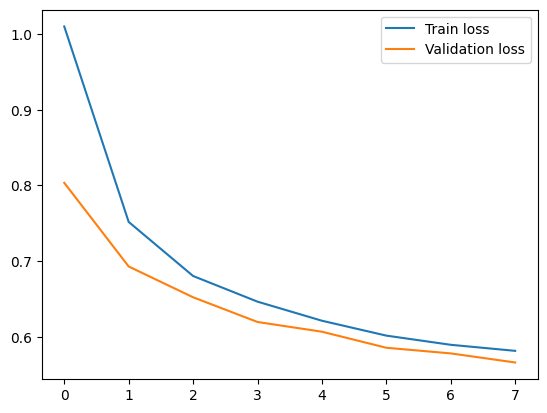

100%|██████████| 10/10 [00:00<00:00, 579.32it/s]


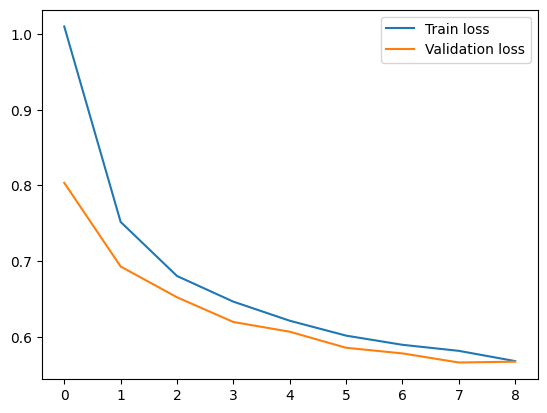

100%|██████████| 10/10 [00:00<00:00, 1886.86it/s]


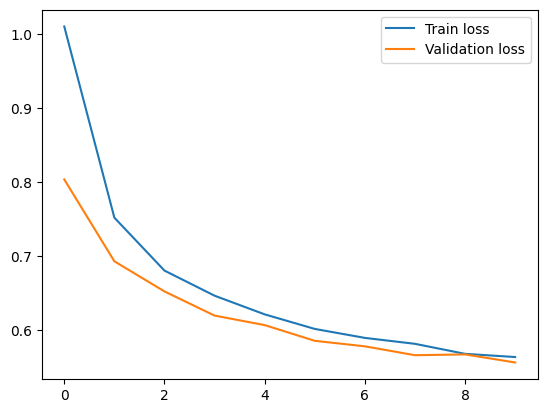

In [ ]:
train_log = []
val_log = []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32

for epoch in range(10):
    train_loss = np.mean(train(model, opt, batchsize=batchsize))
    train_log.append(train_loss)

    val_loss = np.mean(test(model))
    val_log.append(val_loss)


    plot_history(train_log, val_log)


## Metrics



Logloss is hard to interpret. Let's use accuracy metrics

Let's modify functions, so they would return accuracy.

Also, it may be useful to save the model that shows the best quality and save checkpoints (training may take some time and it would be sad to loose progress and if we run too many epochs we may overfit and will want to use model from previous epochs)

100%|██████████| 10/10 [00:00<00:00, 2164.80it/s]


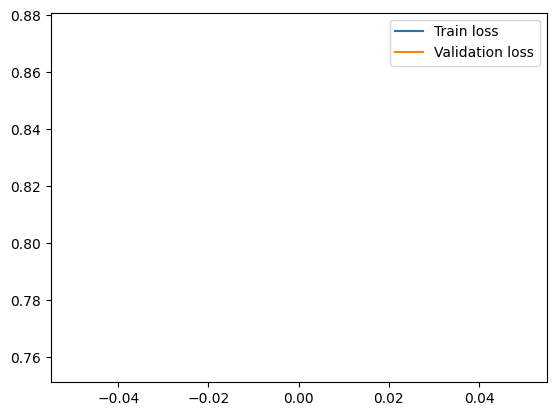

100%|██████████| 10/10 [00:00<00:00, 4527.04it/s]


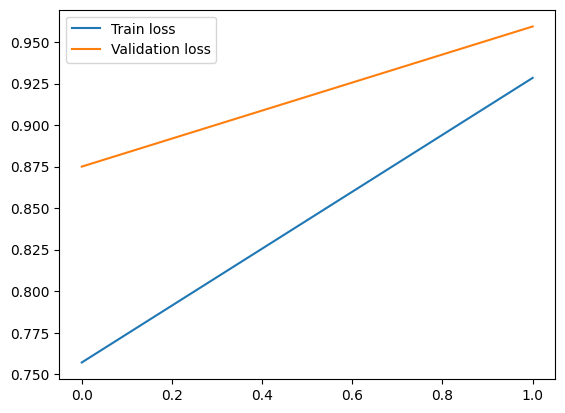

100%|██████████| 10/10 [00:00<00:00, 3120.30it/s]


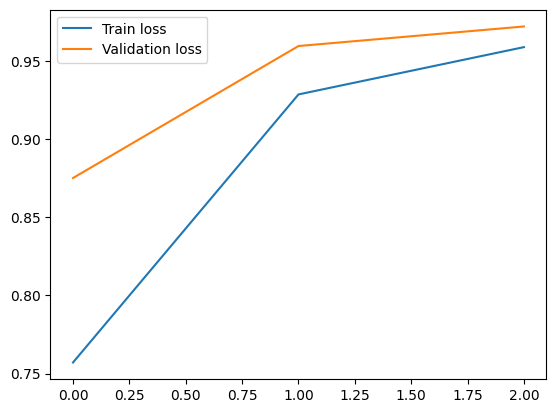

100%|██████████| 10/10 [00:00<00:00, 2182.03it/s]


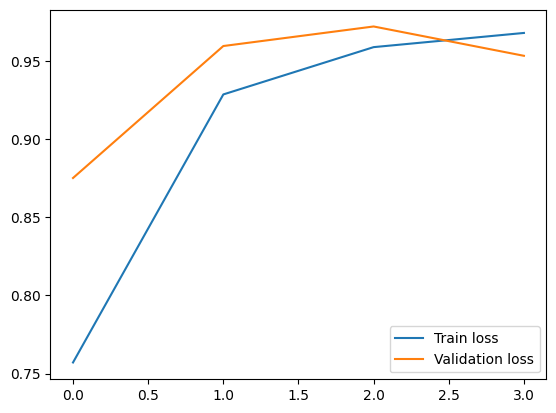

100%|██████████| 10/10 [00:00<00:00, 2257.43it/s]


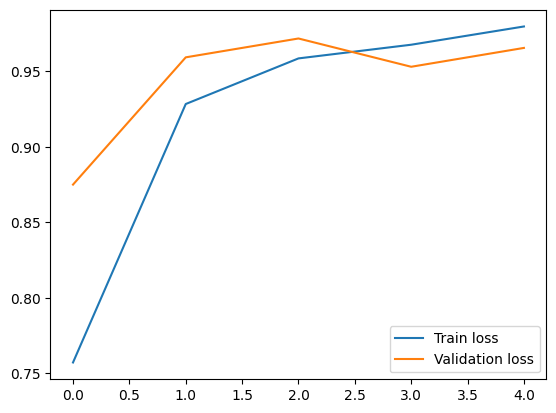

100%|██████████| 10/10 [00:00<00:00, 2148.06it/s]


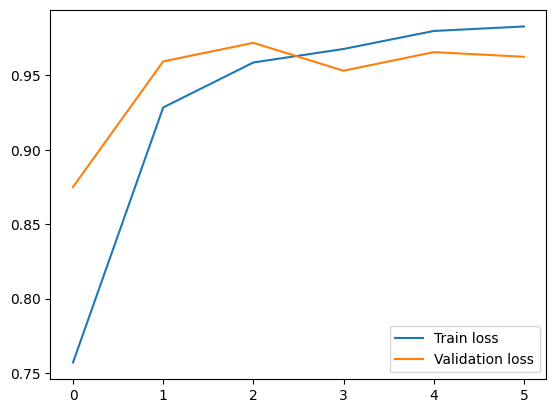

100%|██████████| 10/10 [00:00<00:00, 2060.88it/s]


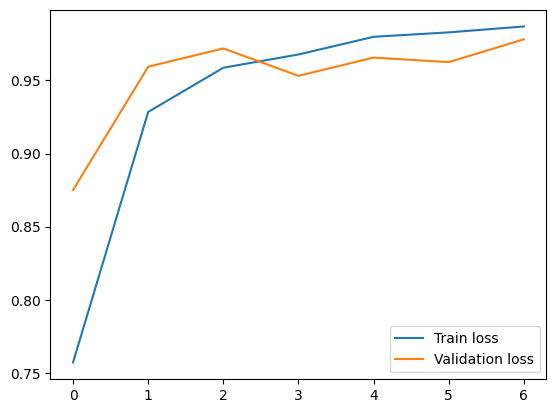

100%|██████████| 10/10 [00:00<00:00, 2648.09it/s]


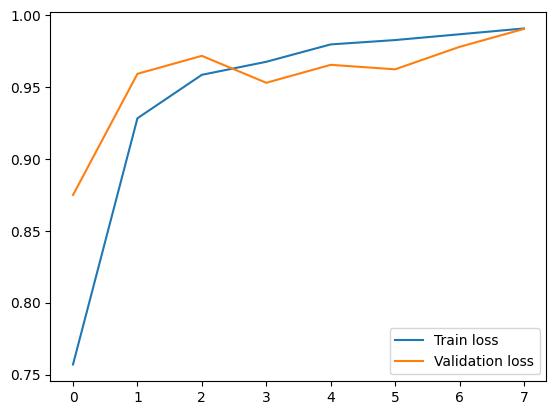

100%|██████████| 10/10 [00:00<00:00, 2224.03it/s]


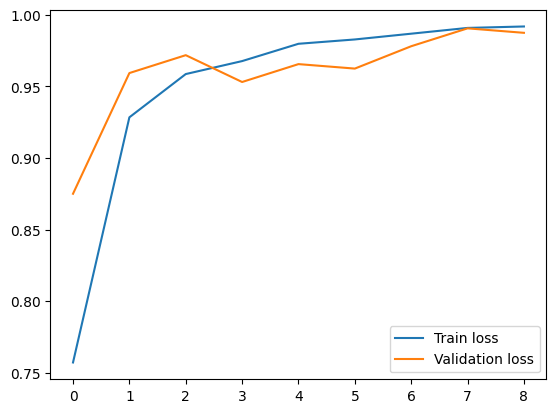

100%|██████████| 10/10 [00:00<00:00, 975.92it/s]


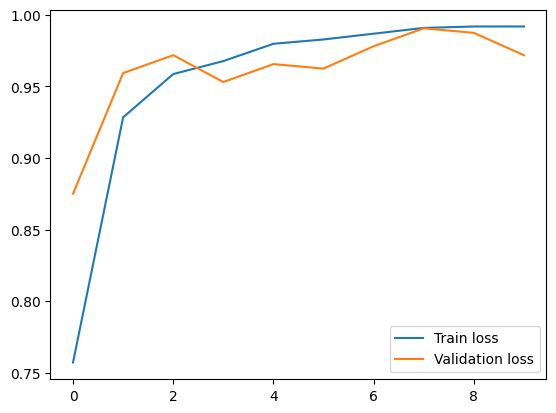

In [ ]:
def train(model, optimizer, batchsize=32):
    loss_log, acc_log = [], []

    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        # compute gradients
        loss.backward()
        # make a step
        optimizer.step()
        loss = loss.item()
        loss_log.append(loss)

        preds = output.argmax(dim=-1) #YOUR CODE
        acc = (target == preds).float().mean() #YOUR CODE
        acc_log.append(acc)
    return loss_log, acc_log



def test(model):
    loss_log, acc_log = [], []


    model.eval()
    for x_batch, y_batch in iterate_minibatches(X_val, y_val, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        with torch.no_grad():
          output = model(data)
          loss = F.nll_loss(output, target)

          loss = loss.item()
          preds = output.argmax(dim=-1)#YOUR CODE

        acc = (target == preds).float().mean() #YOUR CODE
        acc_log.append(acc)
        loss_log.append(loss)

    return loss_log, acc_log


train_log, train_acc_log = [], []
val_log, val_acc_log = [], []

model = Net(100)
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32

best_acc = -1

for epoch in range(10):
    train_loss, train_acc = np.mean(train(model, opt, batchsize=batchsize), axis=1)
    train_log.append(train_loss)
    train_acc_log.append(train_acc)

    #Every 2 epoch save the model
    if epoch % 2 == 0:
      torch.save(model.state_dict(), 'model_checkpoint.pt')

    val_loss, val_acc = np.mean(test(model), axis=1)
    val_log.append(val_loss)
    val_acc_log.append(val_acc)

    #Save the best model
    if val_acc > best_acc:
      torch.save(model.state_dict(), 'model_best.pt')
      best_acc = val_acc



    plot_history(train_acc_log, val_acc_log)


Saving and loading models:

In [ ]:
torch.save(model.state_dict(), 'model.pt')

In [ ]:
model1 = Net(100)
model1.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

New net must have the same architecture.

If we compare parameters:

In [ ]:
for p in model.parameters():
  print(p)
  break

Parameter containing:
tensor([[-0.0618, -0.0620, -0.1567,  ...,  0.0488, -0.0351, -0.0984],
        [-0.0564,  0.0845,  0.1156,  ..., -0.1192, -0.1397, -0.0825],
        [ 0.0521,  0.1386, -0.0011,  ..., -0.0175,  0.0427,  0.1063],
        ...,
        [ 0.0764,  0.1639,  0.0848,  ..., -0.0426,  0.0621,  0.0402],
        [ 0.0960,  0.1680, -0.0912,  ..., -0.0817, -0.0953,  0.0647],
        [-0.0294,  0.0397,  0.0799,  ...,  0.0339, -0.0778, -0.1026]],
       requires_grad=True)


In [ ]:
for p in model1.parameters():
  print(p)
  break

Parameter containing:
tensor([[-0.0618, -0.0620, -0.1567,  ...,  0.0488, -0.0351, -0.0984],
        [-0.0564,  0.0845,  0.1156,  ..., -0.1192, -0.1397, -0.0825],
        [ 0.0521,  0.1386, -0.0011,  ..., -0.0175,  0.0427,  0.1063],
        ...,
        [ 0.0764,  0.1639,  0.0848,  ..., -0.0426,  0.0621,  0.0402],
        [ 0.0960,  0.1680, -0.0912,  ..., -0.0817, -0.0953,  0.0647],
        [-0.0294,  0.0397,  0.0799,  ...,  0.0339, -0.0778, -0.1026]],
       requires_grad=True)





Typical pipeline for working with neural networks:

* Loading and preparing data: describe dataset and dataloader
* Creating neural network: describe model, set of blocks
* Create loss, optimizer and scheduler
* Describe training epoch: iterate through dataloader, get data, run through model, calculate loss, calculate gradients, update weights
* Describe model testing: iterate through dataloader, get data, run through model, get predictions, calculate metrics
* Combine training and testing + saving best/last model

# Sources

https://github.com/esokolov/ml-course-hse/blob/master/2023-fall/seminars/sem04-features.ipynb

https://github.com/aosokin/dl_cshse_ami/blob/master/2019-fall/seminars/seminar2/DL19-fall-seminar2.ipynb

